In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from plotnine import ggplot, aes, geom_bar, geom_line, facet_wrap, theme_minimal, labs

In [2]:
df = pd.read_csv('../benchmark/benchmark_dili_tdc_trf_result.csv')

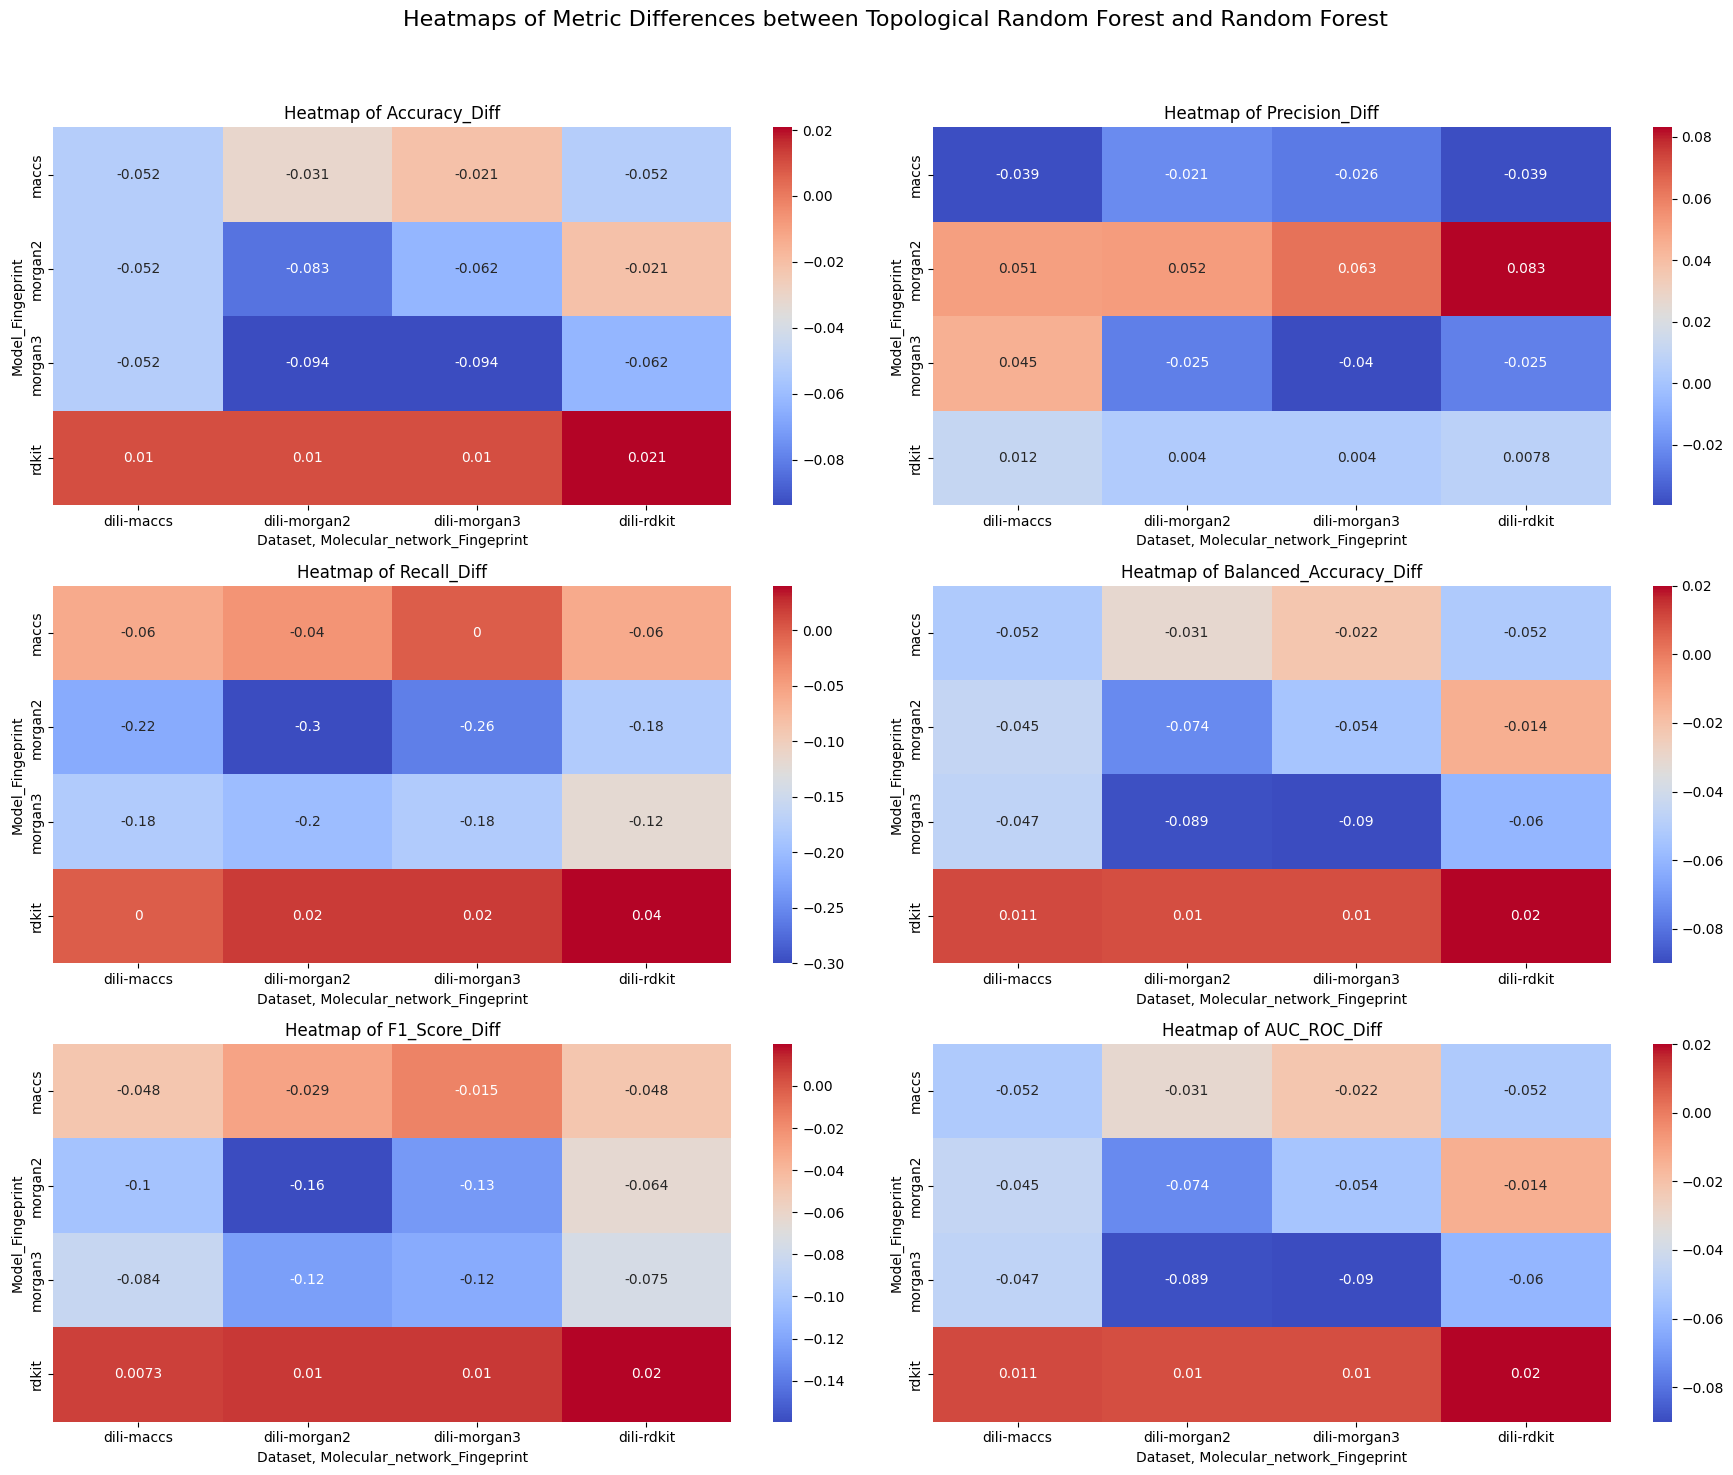

In [19]:
# Calculate differences in metrics
df['Accuracy_Diff'] = df['Topological_Random_Forest_Accuracy'] - df['Random_Forest_Accuracy']
df['Precision_Diff'] = df['Topological_Random_Forest_Precision'] - df['Random_Forest_Precision']
df['Recall_Diff'] = df['Topological_Random_Forest_Recall'] - df['Random_Forest_Recall']
df['Balanced_Accuracy_Diff'] = df['Topological_Random_Forest_Balanced_Accuracy'] - df['Random_Forest_Balanced_Accuracy']
df['F1_Score_Diff'] = df['Topological_Random_Forest_F1_Score'] - df['Random_Forest_F1_Score']
df['AUC_ROC_Diff'] = df['Topological_Random_Forest_AUC_ROC'] - df['Random_Forest_AUC_ROC']

# List of metric differences to plot
metrics = ['Accuracy_Diff', 'Precision_Diff', 'Recall_Diff', 'Balanced_Accuracy_Diff', 'F1_Score_Diff', 'AUC_ROC_Diff']

# Create a single figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
fig.suptitle('Heatmaps of Metric Differences between Topological Random Forest and Random Forest', fontsize=16)

# Group the data by the relevant columns and calculate mean differences
grouped = df.groupby(['Dataset', 'Molecular_network_Fingeprint', 'Model_Fingeprint']).mean().reset_index()

# Iterate over metrics and axes
for i, metric in enumerate(metrics):
    # Determine row and column index
    row = i // 2
    col = i % 2
    
    # Create a pivot table for the heatmap
    pivot_table = grouped.pivot_table(index='Model_Fingeprint', columns=['Dataset', 'Molecular_network_Fingeprint'], values=metric)
    
    # Plot the heatmap on the corresponding subplot
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', ax=axes[row, col])
    axes[row, col].set_title(f'Heatmap of {metric}')
    axes[row, col].set_xlabel('Dataset, Molecular_network_Fingeprint')
    axes[row, col].set_ylabel('Model_Fingeprint')

# Adjust layout for better viewing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/nj/v2qpgqmx5v95v_p1dzfj62yr0000gn/T/ipykernel_46659/3709199775.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=45)
/var/folders/nj/v2qpgqmx5v95v_p1dzfj62yr0000gn/T/ipykernel_46659/3709199775.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


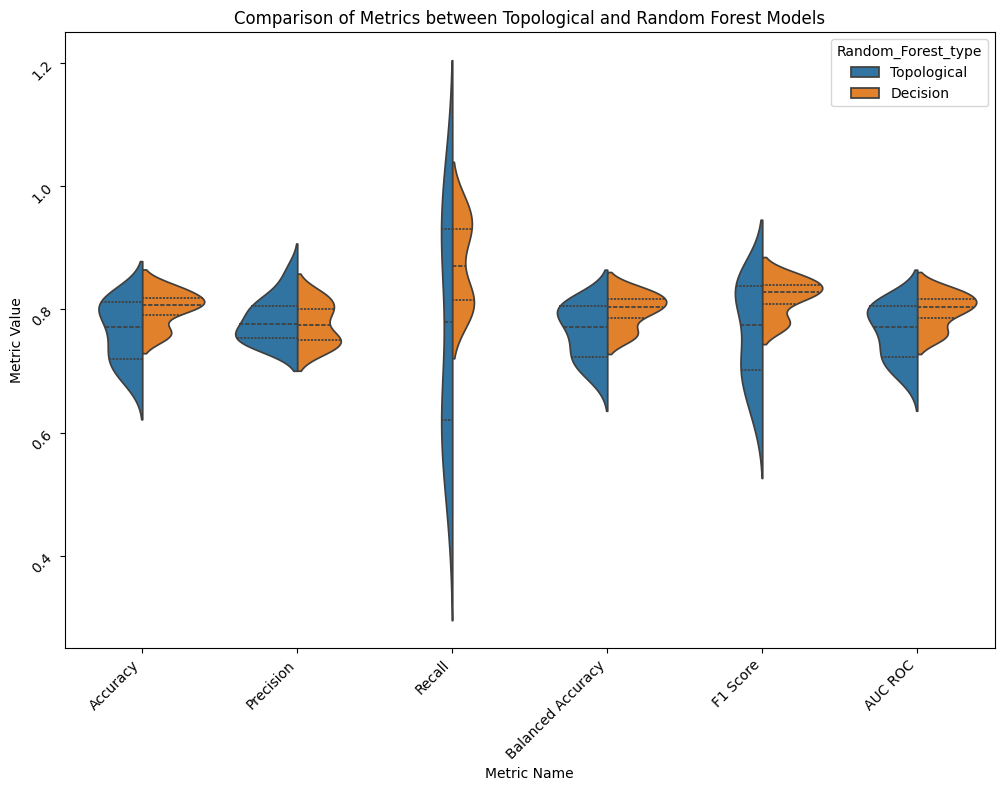

In [20]:
# Define metrics to melt
metrics = [
    "Topological_Random_Forest_Accuracy", "Random_Forest_Accuracy",
    "Topological_Random_Forest_Precision", "Random_Forest_Precision",
    "Topological_Random_Forest_Recall", "Random_Forest_Recall",
    "Topological_Random_Forest_Balanced_Accuracy", "Random_Forest_Balanced_Accuracy",
    "Topological_Random_Forest_F1_Score", "Random_Forest_F1_Score",
    "Topological_Random_Forest_AUC_ROC", "Random_Forest_AUC_ROC"
]

# Melt the DataFrame to create a DataFrame with metric types and values
df_melted = df.melt(id_vars=['Dataset', 'Molecular_network_Fingeprint', 'Model_Fingeprint'],
                    value_vars=metrics,
                    var_name='metric_type',
                    value_name='value')

# Extract the decision tree type (Topological or Decision) and metric name from the metric type
df_melted['Random_Forest_type'] = df_melted['metric_type'].apply(lambda x: 'Topological' if 'Topological' in x else 'Decision')
df_melted['metric_name'] = df_melted['metric_type'].apply(lambda x: x.replace("Topological_Random_Forest_", "").replace("Random_Forest_", "").replace("_", " "))

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a violin plot comparing the distributions of each metric for "Topological Decision Tree" and "Decision Tree"
ax = sns.violinplot(data=df_melted, x='metric_name', y='value', hue='Random_Forest_type', split=True, inner='quartile')

# Set y-tick labels rotation (optional, you can adjust the angle as needed)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)

# Set x-tick labels to remove underscores and rotate for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set title and labels
plt.title('Comparison of Metrics between Topological and Random Forest Models')
plt.xlabel('Metric Name')
plt.ylabel('Metric Value')

# Show the plot
plt.show()

# Visualising Topological impurity reduction in practice

In [5]:
import os
from joblib import load
os.chdir('../benchmark')

In [6]:
clf = load("./dili.joblib")

In [7]:
clf

{'split_feature': 650,
 'split_value': 0,
 'left': {'split_feature': 1855,
  'split_value': 0,
  'left': {'split_feature': 1363,
   'split_value': 0,
   'left': {'split_feature': 97,
    'split_value': 0,
    'left': {'split_feature': 932,
     'split_value': 0,
     'left': {'split_feature': 321,
      'split_value': 0,
      'left': {'split_feature': 1707,
       'split_value': 0,
       'left': {'split_feature': 20,
        'split_value': 0,
        'left': {'split_feature': 23,
         'split_value': 0,
         'left': {'split_feature': 36,
          'split_value': 0,
          'left': {'split_feature': 165,
           'split_value': 0,
           'left': {'split_feature': 524,
            'split_value': 0,
            'left': {'leaf': True,
             'class': 0,
             'topological_impurity': 0.0,
             'P_active': 0.0},
            'right': {'leaf': True,
             'class': 1,
             'topological_impurity': 0.0,
             'P_active': 1.0},
          

# Draw the Decision Tree as Image

In [8]:
import pydot

def plot_binary_decision_tree(tree_dict):
    def add_node_and_edges(graph, node, node_id):
        # Create the current node in the graph
        if 'leaf' in node:
            # Leaf node
            label = f"class: {node['class']}\nimpurity: {node['topological_impurity']:.2f}\nP_active: {node['P_active']}"
            graph.add_node(pydot.Node(node_id, label=label, shape='ellipse', style='filled', fillcolor='lightblue'))
        else:
            # Decision node
            label = f"split_feature: {node['split_feature']}\nsplit_value: {node['split_value']}\nP_active: {node['P_active']}\nimpurity: {node['topological_impurity']:.2f}"
            graph.add_node(pydot.Node(node_id, label=label, shape='box'))

            # Recur on left and right children
            left_node_id = f"{node_id}_left"
            right_node_id = f"{node_id}_right"
            
            # Add left and right child nodes
            add_node_and_edges(graph, node['left'], left_node_id)
            add_node_and_edges(graph, node['right'], right_node_id)
            
            # Add edges from current node to left and right children
            graph.add_edge(pydot.Edge(node_id, left_node_id, label='left'))
            graph.add_edge(pydot.Edge(node_id, right_node_id, label='right'))
    
    # Create a graph
    graph = pydot.Dot(graph_type='digraph')

    # Start adding nodes and edges from the root
    add_node_and_edges(graph, tree_dict, "root")
    
    # Display the graph
    graph.write_png('../dt.png')
    print("Decision tree plotted and saved as 'binary_decision_tree.png'.")

# Plot the binary decision tree
plot_binary_decision_tree(clf)

Decision tree plotted and saved as 'binary_decision_tree.png'.
